In [1]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# matplotlib settings 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

In [6]:
job = Gaia.launch_job_async("SELECT * \
FROM gaiaedr3.gaia_source \
WHERE CONTAINS(POINT('ICRS',83.63305926163925,22.014497367986387),CIRCLE('ICRS',ra,dec,7.2))=1 \
AND phot_g_mean_mag<12 \
AND parallax > 0 \
AND parallax < 1 \
ORDER BY phot_g_mean_mag ASC;" \
, dump_to_file=True, output_file = 'crab_pulsar_trail6')

print (job)

Saving results to: crab_pulsar_trail6
Jobid: 1636381211142O
Phase: COMPLETED
Owner: None
Output file: crab_pulsar_trail6
Results: None


In [7]:
r = job.get_results()


In [8]:
import os
import sys, math
os.environ['DUST_DIR']= '/Users/elviracruz/DUST_DIR/'
import mwdust
import subprocess, shutil
import datetime
import numpy as np
import scipy.stats as sts
import astropy.units as u
from astropy.coordinates import SkyCoord
combined19= mwdust.Combined19(filter='CTIO V')

In [9]:
ra_og = r['ra']
dec_og = r['dec']
dist_og = 1/np.array(r['parallax'])

ra11 = []
dec11 = []
dist11 = []
for i in ra_og:
    ra11.append(i)    
for i in dec_og:
    dec11.append(i) 
for i in dist_og:
    dist11.append(i)

In [10]:
print(len(ra_og))

6304


In [11]:
#written by Chris Kochanek
for i in range(len(ra11)):
    ra = ra11[i]
    dec = dec11[i]
    dist = dist11[i]
    j2000 = SkyCoord(ra=ra,dec=dec,unit='deg',frame='fk5',equinox='J2000')
    j2000.transform_to('galactic')
    l = (j2000.galactic.l.degree)
    b = (j2000.galactic.b.degree)
    # convert to E(B-V) on an R_V=3.1 scale
    # this is the V band extinction.
    ebv = combined19(l,b,dist)/3.1
print('%13.6f %13.6f %13.6f %13.6f %13.6f %13.6f' %
      (ebv,ra,dec,dist,l,b))

     0.484490     78.544964     23.943469      4.681229    180.325419     -8.618809


In [12]:
pos_cp = [83.63305926163925,22.014497367986387]
v_cpx = 1*(np.sin((np.pi/180)*(90-pos_cp[1]))*np.cos((np.pi*pos_cp[0])/180))
v_cpy = 1*(np.sin((np.pi/180)*(90-pos_cp[1]))*np.sin((np.pi*pos_cp[0])/180))
v_cpz = 1*(np.cos((np.pi/180)*(90-pos_cp[1])))
v_cp = [v_cpx,v_cpy,v_cpz]

ra_stars = r['ra']
dec_stars = r['dec']
dist_par = r['parallax']
G_mag_mean =r['phot_g_mean_mag']
bprp = r['bp_rp']
bp_mean_mag = r['phot_bp_mean_mag']
rp_mean_mag = r['phot_rp_mean_mag']

v_star = []

star_cp_cross = []
mag_cross = []
accpt_ra = []
accpt_dec = []
accpt_parallax = []
accpt_Mg_mean = []
accpt_bprp = []
accpt_bp_mean_mag = []
accpt_rp_mean_mag = []
accpt_mag_cross = []

for i in range(len(ra_stars)):
    vx_star = (100/dist_par[i])*(np.sin((np.pi/180)*(90-dec_stars[i]))*np.cos((np.pi*ra_stars[i])/180))
    vy_star = (100/dist_par[i])*(np.sin((np.pi/180)*(90-dec_stars[i]))*np.sin((np.pi*ra_stars[i])/180))
    vz_star = (100/dist_par[i])*(np.sin((np.pi/180)*(90-dec_stars[i])))
    v_star.append([vx_star,vy_star,vz_star])
    star_cp_cross.append(np.cross(v_cp,v_star[i]))
    mag_cross.append(np.linalg.norm(star_cp_cross[i]))
    if mag_cross[i] > 0 and mag_cross[i] < 100 :
        accpt_ra.append(ra_stars[i])
        accpt_dec.append(dec_stars[i])
        accpt_parallax.append(dist_par[i])
        accpt_Mg_mean.append(G_mag_mean[i])
        accpt_bprp.append(bprp[i])
        accpt_bp_mean_mag.append(bp_mean_mag[i])
        accpt_rp_mean_mag.append(rp_mean_mag[i])
        accpt_mag_cross.append(mag_cross[i])

In [13]:
M_G1= accpt_Mg_mean - 5*np.log10(100/np.array(accpt_parallax))


dist_og = 1/np.array(accpt_parallax)

#written by Chris Kochanek
for i in range(len(accpt_ra)):
    ra = accpt_ra[i]
    dec = accpt_dec[i]
    dist = dist_og[i]
    j2000 = SkyCoord(ra=ra,dec=dec,unit='deg',frame='fk5',equinox='J2000')
    j2000.transform_to('galactic')
    l = (j2000.galactic.l.degree)
    b = (j2000.galactic.b.degree)
    # convert to E(B-V) on an R_V=3.1 scale
    # this is the V band extinction.
    ebv = combined19(l,b,dist)/3.1
print('%13.6f %13.6f %13.6f %13.6f %13.6f %13.6f' %
      (ebv,ra,dec,dist,l,b))

gmag_extcorr1 = np.array(M_G1) - ebv*3.1*0.86117

bp_extcorr1 = np.array(accpt_bp_mean_mag) - ebv*3.1*1.06126

rp_extcorr1 = np.array(accpt_rp_mean_mag) - ebv*3.1*0.64753

bp_rp_extcorr1 = bp_extcorr1 - rp_extcorr1




     0.380671     78.351864     19.155485      1.238547    184.225086    -11.485244


In [14]:
print(len(accpt_ra))
print(np.max(accpt_mag_cross))
print(np.min(accpt_mag_cross))
print(np.min(gmag_extcorr1))

4498
99.99486951407357
48.35318801662396
-7.089941507057012


In [15]:
from numpy import *
def isochrones1(isochrone_name):
    Gmag,G_BPmag, G_RPmag = np.loadtxt(isochrone_name,unpack=True, usecols=[28,29,30])
    logL , logTe = np.loadtxt(isochrone_name,unpack=True, usecols=[6,7])
    G_bprp = np.array(G_BPmag) - np.array(G_RPmag)
    return G_bprp,Gmag
def isochrones2(isochrone_name):
    Gmag,G_BPmag, G_RPmag = np.loadtxt(isochrone_name,unpack=True, usecols=[11,12,13])
    logL , logTe = np.loadtxt(isochrone_name,unpack=True, usecols=[6,7])
    G_bprp = np.array(G_BPmag) - np.array(G_RPmag)
    return G_bprp,Gmag

def iso_diff_ages(isochrone_name,age):
    logAge,Gmag,G_BPmag, G_RPmag = np.loadtxt(isochrone_name,unpack=True, usecols=[2,28,29,30])
    #logL , logTe = np.loadtxt(isochrone_name,unpack=True, usecols=[6,7])
    accptGmag = []
    accptG_BPmag = []
    accptG_RPmag = []
    for i in range(len(logAge)):
        if logAge[i]==age:
            accptGmag.append(Gmag[i])
            accptG_BPmag.append(G_BPmag[i])
            accptG_RPmag.append(G_RPmag[i])
    
    #G_bprp = np.array(G_BPmag) - np.array(G_RPmag)
    accptG_bprp = np.array(accptG_BPmag) - np.array(accptG_RPmag)
    return accptG_bprp,accptGmag

G_bprp65,Gmag65=iso_diff_ages('output206773153114.dat',6.5)
G_bprp75,Gmag75=iso_diff_ages('output206773153114.dat',7.5)
G_bprp85,Gmag85=iso_diff_ages('output206773153114.dat',8.5)
G_bprp95,Gmag95=iso_diff_ages('output206773153114.dat',9.5)
G_bprp60,Gmag60=iso_diff_ages('output764180970451.dat',6.0)
G_bprp70,Gmag70=iso_diff_ages('output764180970451.dat',7.0)
G_bprp80,Gmag80=iso_diff_ages('output764180970451.dat',8.0)
G_bprp90,Gmag90=iso_diff_ages('output764180970451.dat',9.0)
G_bprp10,Gmag10=iso_diff_ages('output764180970451.dat',10.0)



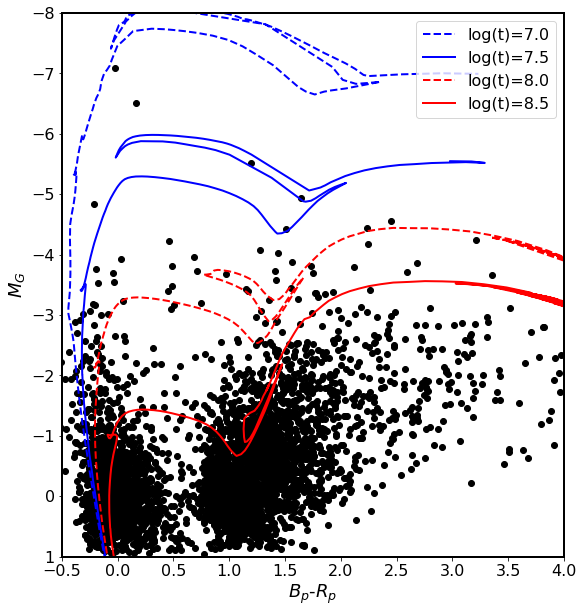

In [16]:
plt.figure(figsize=(9,10))
plt.ylim(1.0,-8)
plt.xlim(-0.5,4)
plt.scatter(bp_rp_extcorr1,gmag_extcorr1, color='black')
#plt.plot(G_bprp60,Gmag60,'--',color='black',label='log(t)=6.0') 
#plt.plot(G_bprp65,Gmag65,color='black',label='log(t)=6.5')
plt.plot(G_bprp70,Gmag70,'--',color='blue',label='log(t)=7.0')
plt.plot(G_bprp75,Gmag75,color='blue',label='log(t)=7.5')
plt.plot(G_bprp80,Gmag80,'--',color='red',label='log(t)=8.0') 
plt.plot(G_bprp85,Gmag85,'-',color='red',label='log(t)=8.5')  
#plt.plot(G_bprp90,Gmag90,'--',color='orange',label='log(t)=9.0')
#plt.plot(G_bprp95,Gmag95,color='green',label='log(t)=9.5')
#plt.plot(G_bprp10,Gmag10,'--',color='orange',label='log(t)=10.0')
#plt.title('Extinction Corrected')
plt.xlabel('$B_{p}$-$R_{p}$',)
plt.ylabel('$M_{G}$')
plt.legend()
plt.show()

v_cpy
vx_star
vz_star

In [ ]:
dot_yx_cpstar =[]
for i in range(len(v_cpy)):
    dot_ycp_xstar = np.dot(v_cpy[i],vx_star[i])
    dot_yx_cpstar.append(dot_ycp_xstar[i])
    

dot_ycp_xstar